# 影像分割評估指標

## 匯入所需套件

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix

假設我們要預測的類別為兩類：有病 (label=1)、沒病 (label=0)

* TP (True Positive)：該類別實際為有病，預測也為有病 (真陽性，表示檢測正確)。

* FP (False Positive)：該類別實際為沒有病，預測成有病 (真陰性，表示誤檢)。

* FN (False Negative)：該類別實際為有病，預測為沒有病 (假陰性，表示漏檢)。

* TN (True Negative)：該類別實際為沒有病，預測也為沒有病 (假陽性，不需要被檢測的地方沒被檢測出來)。





<img src="https://imgur.com/6wtOsZJ.png" width=400/>


In [ ]:
ground_truth = np.array([1, 1, 0, 1, 0, 0, 1, 1, 0])
pred_label = np.array([1, 0, 0, 1, 1, 0, 1, 1, 1])

In [ ]:
### tp
# 所有實際與預測相同的值
gt_equal_pred = np.where(ground_truth==pred_label, 1, 0)

# 實際值與預測值相同，並且實際為真
tp = np.sum(gt_equal_pred * ground_truth)

### fn
# 所有實際為真的數量去除掉 TP
fn = np.sum(ground_truth) - tp

### fp
# 所有預測為真的數量去除掉 TP
fp = np.sum(pred_label) - tp

### tn
# 所有實際為假的值
gt_is_false = np.where(np.logical_not(ground_truth), 1, 0)

# 實際值與預測值相同，並且預測為假
tn = np.sum(gt_equal_pred * gt_is_false)

print("tp: ", tp)
print("fn: ", fn)
print("fp: ", fp)
print("tn: ", tn)

tp:  4
fn:  1
fp:  2
tn:  2


可以藉由 sklearn 計算 confusion matrix，參考: [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)


In [ ]:
tn, fp, fn, tp = confusion_matrix(ground_truth, pred_label).ravel()
print("tp: ", tp)
print("fn: ", fn)
print("fp: ", fp)
print("tn: ", tn)

tp:  4
fn:  1
fp:  2
tn:  2


接著可以將 Confusion Matrix 畫圖顯示

In [ ]:
def confusion_matrix_plot(y_true, y_pred, classes_names):
  plt.figure(figsize=(8, 6))
  classes_number = [i for i in range(len(classes_names))]
  tn, fp, fn, tp = confusion_matrix(ground_truth, pred_label, labels=classes_number).ravel()
  cf_matrix = np.array([[tp,fn],[fp,tn]])
  cf_matrix = pd.DataFrame(cf_matrix, index = classes_names, columns = classes_names)  
  sns.heatmap(cf_matrix, cmap='Blues', annot=True)
  plt.title('Confusion Matrix', fontsize=16)
  plt.xlabel('Predicted', fontsize=16)
  plt.ylabel('Actual', fontsize=16)
  plt.show()

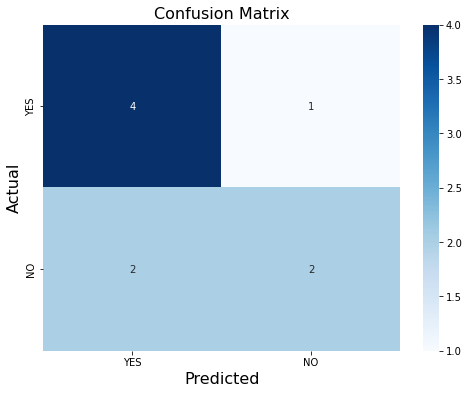

In [ ]:
confusion_matrix_plot(ground_truth, pred_label, ['YES', 'NO'])

# IoU

<img src="https://imgur.com/IVftRDH.png" width=800/>

In [ ]:
iou = tp / (tp + fp + fn)
print("iou:", iou)

iou: 0.5714285714285714


# Precision、Recall

*   Precision (精確率)：所有預測為真的數據中，實際也為真的機率

*   Recall (召回率)：所有實際為真的數據中，預測也為真的機率

<img src="https://imgur.com/7Wcfqam.png" width=300/>


以二分類為例，假設目前總共有十個值

* ground_truth 表示是否有病 -> 有病 (label=1)、沒有病 (label=0)

* pred_score 為預測出是否有病的機率

* threshold 設定為 0.5


<img src="https://imgur.com/JwOt26q.png" width=600/>

In [ ]:
ground_truth = np.array([1, 1, 0, 1, 0, 0, 1, 1, 0])
pred_score = np.array([0.8, 0.4, 0.1, 0.7, 0.6, 0.2, 0.9, 0.8, 0.6])

In [ ]:
threshold = 0.5
pred_label = np.where(pred_score > threshold, 1, 0)
print("pred_label:", pred_label)

pred_label: [1 0 0 1 1 0 1 1 1]


In [ ]:
precision = tp / (tp + fp)
print("precision:", precision)

precision: 0.6666666666666666


In [ ]:
recall = tp / (tp + fn)
print("recall:", recall)

recall: 0.8


# F1-score
F1-score 為 Precision、Recall 的調和平均數，可同時考慮這兩個數值

<img src="https://imgur.com/WLoBr61.png" width=400/>

In [ ]:
f1_score = 2*tp / (2*tp + fp + fn)
print("f1_score:", f1_score)

f1_score: 0.7272727272727273


# Sensitivity、Specificity

在醫學上經常使用 Sensitivity、Specificity 這兩個指標

*   Sensitivity (靈敏度、真陽性率、Recall)：所有實際為真的數據中，預測也為真的機率。表示有多少真正得病的人被診斷出有得病。

*   Specificity (特異度、真陰性率)：所有實際為假的數據中，預測也為假的機率。表示有多少沒有得病的人被檢驗正確 (沒得病)。



<img src="https://imgur.com/PHzO8Pm.png" width=400/>

In [ ]:
sensitivity = tp / (tp + fn)
print("sensitivity:", sensitivity)

sensitivity: 0.8


In [ ]:
specificity = tn / (tn + fp)
print("specificity:", specificity)

specificity: 0.5


# P-R Curve

P-R Curve 是以 Recall 為 x 軸、 Precision 為 y 軸所繪製出來的圖，Precision、Recall 值越高表示模型越好，P-R Curve 越往右上方靠近，AUC 越大。


<img src="https://imgur.com/naGFelD.png" width=300/>


以二分類為例，假設目前總共有十個值

* ground_truth 表示是否有病 -> 有病 (label=1)、沒有病 (label=0)

* pred_score 為預測出是否有病的機率

* threshold 設定為 0.5

<img src="https://imgur.com/JwOt26q.png" width=500/>


接著，將 predict_label 進行排序

<img src="https://imgur.com/vJqzQho.png" width=600/>

In [ ]:
ground_truth = np.array([1, 1, 0, 1, 0, 0, 1, 1, 0])
pred_score = np.array([0.8, 0.4, 0.1, 0.7, 0.6, 0.2, 0.9, 0.8, 0.6])

threshold = 0.5

In [ ]:
zip_list = zip(ground_truth, pred_score)
sort_zip_list = sorted(zip_list, key=lambda x:x[1], reverse=True)
zip_list = zip(*sort_zip_list)
ground_truth, pred_score = [np.array(list(x)) for x in zip_list]
print("ground_truth: ", ground_truth)
print("pred_score: ", pred_score)

pred_label = np.where(pred_score>=threshold, 1, 0)
print("pred_label: ", pred_label)

ground_truth:  [1 1 1 1 0 0 1 0 0]
pred_score:  [0.9 0.8 0.8 0.7 0.6 0.6 0.4 0.2 0.1]
pred_label:  [1 1 1 1 1 1 0 0 0]


計算每個 pixel 各自的狀態

In [ ]:
def cal_state_list(ground_truth, pred_label):
  nd = len(ground_truth)
  tp_list = [0] * nd
  tn_list = [0] * nd
  fn_list = [0] * nd
  fp_list = [0] * nd
  for i in range(len(ground_truth)):
    gt = ground_truth[i]
    pred = pred_label[i]

    if gt == 1 and pred == 1:
      tp_list[i] = 1

    elif gt == 1 and pred == 0:
      fn_list[i] = 1
    
    elif gt == 0 and pred == 1:
      fp_list[i] = 1

    else:
      tn_list[i] = 1

  return tp_list, tn_list, fn_list, fp_list

In [ ]:
tp_list, tn_list, fn_list, fp_list = cal_state_list(ground_truth, pred_label)
tp_fn_len = np.sum(fn_list) + np.sum(tp_list)

print("tp_list: ", tp_list)
print("tn_list: ", tn_list)
print("fn_list: ", fn_list)
print("fp_list: ", fp_list)

tp_list:  [1, 1, 1, 1, 0, 0, 0, 0, 0]
tn_list:  [0, 0, 0, 0, 0, 0, 0, 1, 1]
fn_list:  [0, 0, 0, 0, 0, 0, 1, 0, 0]
fp_list:  [0, 0, 0, 0, 1, 1, 0, 0, 0]


從 rank =1 開始，一個一個 rank 計算 Precision、Recall

<img src="https://imgur.com/Eq4pjOX.png" width=800/>

In [ ]:
# refer; https://github.com/Cartucho/mAP/blob/3605865a350859e60c7b711838d09c4e0012c774/main.py

cumsum = 0
for idx, val in enumerate(fp_list):
    fp_list[idx] += cumsum
    cumsum += val

cumsum = 0
for idx, val in enumerate(tp_list):
    tp_list[idx] += cumsum
    cumsum += val

recall = tp_list[:]
for idx, val in enumerate(tp_list):
  recall[idx] = float(tp_list[idx]) / tp_fn_len

precision = tp_list[:]
for idx, val in enumerate(tp_list):
  precision[idx] = float(tp_list[idx]) / (fp_list[idx] + tp_list[idx])

print("recall: ", recall)
print("precision: ", precision)

recall:  [0.2, 0.4, 0.6, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
precision:  [1.0, 1.0, 1.0, 1.0, 0.8, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]


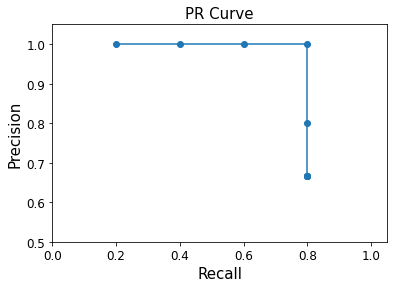

In [ ]:
plt.title('PR Curve', fontsize=15)
plt.xlabel("Recall", fontsize=15)
plt.ylabel("Precision", fontsize=15)
plt.xlim(0, 1.05)
plt.ylim(0.5, 1.05)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.scatter(recall, precision)
plt.plot(recall, precision)
plt.show()

# ROC Curve

ROC Curve 是以 FPR 為 x 軸、 TPR 為 y 軸所繪製出來的圖，其中 FPR (偽陽性率) 為 1- Specificity、TPR 為 Sensitivity。
當 FPR 越低 (Specificity—正確檢測出負樣本的機率越高)、TPR 越高表示模型越好，因此 ROC Curve 會越往左上方靠近，使得 AUC 越大。

<img src="https://imgur.com/7FFgNRX.png" width=300/>

以二分類為例，假設目前總共有十個值

* ground_truth 表示是否有病 -> 有病 (label=1)、沒有病 (label=0)

* pred_score 為預測出是否有病的機率

* threshold 設定為 0.5

<img src="https://imgur.com/JwOt26q.png" width=500/>

根據模型的預測結果 score 進行排序

<img src="https://imgur.com/JkKl3eK.png" width=500/>

In [ ]:
ground_truth = np.array([1, 1, 0, 1, 0, 0, 1, 1, 0])
pred_score = np.array([0.8, 0.4, 0.1, 0.7, 0.6, 0.2, 0.9, 0.8, 0.6])

threshold = 0.5

In [ ]:
zip_list = zip(ground_truth, pred_score)
sort_zip_list = sorted(zip_list, key=lambda x:x[1], reverse=True)
zip_list = zip(*sort_zip_list)
ground_truth, pred_score = [np.array(list(x)) for x in zip_list]
print("ground_truth: ", ground_truth)
print("pred_score: ", pred_score)

ground_truth:  [1 1 1 1 0 0 1 0 0]
pred_score:  [0.9 0.8 0.8 0.7 0.6 0.6 0.4 0.2 0.1]


計算每個 pixel 各自的狀態

In [ ]:
def cal_state_list(ground_truth, pred_label):
  nd = len(ground_truth)
  tp_list = [0] * nd
  tn_list = [0] * nd
  fn_list = [0] * nd
  fp_list = [0] * nd
  for i in range(len(ground_truth)):
    gt = ground_truth[i]
    pred = pred_label[i]

    if gt == 1 and pred == 1:
      tp_list[i] = 1

    elif gt == 1 and pred == 0:
      fn_list[i] = 1
    
    elif gt == 0 and pred == 1:
      fp_list[i] = 1

    else:
      tn_list[i] = 1

  return tp_list, tn_list, fn_list, fp_list

從 rank =1 開始，一個一個 rank 計算。將各自的 score 作為閾值計算 TPR、FPR

<img src="https://imgur.com/HvjVtnu.png" width=500/>

In [ ]:
for i in range(len(ground_truth)):
  threshold = pred_score[i]

  pred_label = np.where(pred_score>=threshold, 1, 0)
  tp_list, tn_list, fn_list, fp_list = cal_state_list(ground_truth, pred_label)

  tp_len = np.sum(tp_list)
  tn_len = np.sum(tn_list)
  fn_len = np.sum(fn_list)
  fp_len = np.sum(fp_list)

  cumsum = 0
  for idx, val in enumerate(fp_list):
      fp_list[idx] += cumsum
      cumsum += val

  cumsum = 0
  for idx, val in enumerate(tp_list):
      tp_list[idx] += cumsum
      cumsum += val

  tpr = tp_list[:]
  for idx, val in enumerate(tp_list):
      tpr[idx] = float(tp_list[idx]) / (tp_len + fn_len)

  fpr = fp_list[:]
  for idx, val in enumerate(fp_list):
      fpr[idx] = float(fp_list[idx]) / (tn_len + fp_len)

print("TPR: ", tpr)
print("FPR: ", fpr)

TPR:  [0.2, 0.4, 0.6, 0.8, 0.8, 0.8, 1.0, 1.0, 1.0]
FPR:  [0.0, 0.0, 0.0, 0.0, 0.25, 0.5, 0.5, 0.75, 1.0]


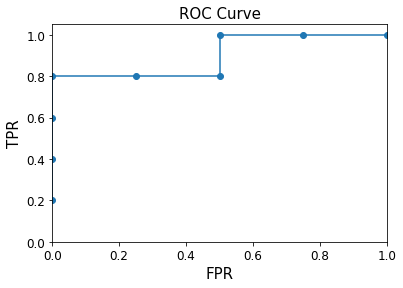

In [ ]:
plt.title('ROC Curve', fontsize=15)
plt.xlabel("FPR", fontsize=15)
plt.ylabel("TPR", fontsize=15)
plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.show()

# Dice

Dice coefficient 用於評估 X、Y 的相似度，範圍在 0 ~ 1 之間，|𝑋|、|𝑌| 分別為 Ground Truth 和 predict

<img src="https://imgur.com/rfIlcxh.png" width=400/>



In [ ]:
ground_truth = np.array([1, 1, 0, 1, 0, 0, 1, 1, 0])
pred_label = np.array([1, 0, 0, 1, 1, 0, 1, 1, 1])

In [ ]:
### tp
# 所有實際與預測相同的值
gt_equal_pred = np.where(ground_truth==pred_label, 1, 0)

# 實際值與預測值相同，並且實際為真
tp = np.sum(gt_equal_pred * ground_truth)

### fn
# 所有實際為真的數量去除掉 TP
fn = np.sum(ground_truth) - tp

### fp
# 所有預測為真的數量去除掉 TP
fp = np.sum(pred_label) - tp

### tn
# 所有實際為假的值
gt_is_false = np.where(np.logical_not(ground_truth), 1, 0)

# 實際值與預測值相同，並且預測為假
tn = np.sum(gt_equal_pred * gt_is_false)

print("tp: ", tp)
print("fn: ", fn)
print("fp: ", fp)
print("tn: ", tn)

tp:  4
fn:  1
fp:  2
tn:  2


In [ ]:
dice = 2*tp / (2*tp + fn + fp)
print("dice: ", dice)

dice:  0.7272727272727273
